# Convolution Filtering

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import os
from matplotlib import pyplot as plt
%matplotlib inline

*useful functions*

In [2]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


*sample images path*

In [38]:
img1_path = "../images/_tmp/school_pool_66_15.jpg" # gate detection was easier - all 3 bars
img2_path = "../images/_tmp/school_pool_66_75.jpg" # had to get a little creative to find this

*import images*

In [39]:
img1 = cv2.imread(img1_path )
img2 = cv2.imread(img2_path)

print(img1.shape)
print(img2.shape)

(480, 744, 3)
(480, 744, 3)


*show images*

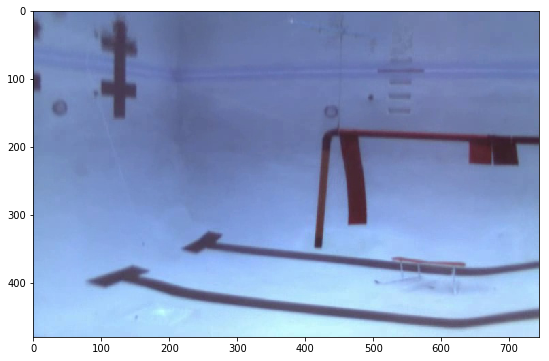

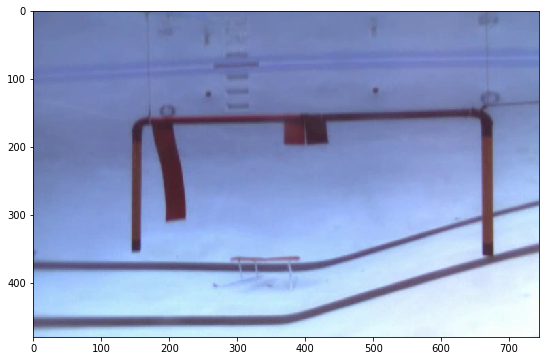

In [44]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) )
plt.show()

## Filters - *different sizes*

*basic kernel*

In [ ]:
# kernel_1 = np.ones((3, 3), np.float32)
kernel_1 = np.ones((3, 3), np.float32) / 9 # tutorial basic
# kernel_1 = np.ones((5, 5), np.float32) / 25 # tutorial basic

*basic __vertical__ and __horizontal__ filters

In [72]:
# 3x3

vert = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

horiz = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

# kernel_vert = np.array(vert)
# kernel_horiz = np.array(horiz)
kernel_vert = np.array(vert)/9
kernel_horiz = np.array(horiz)/9

In [62]:
# 5x5

vert = [
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1]
]

horiz = [
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]

# kernel_vert = np.array(vert)
# kernel_horiz = np.array(horiz)
kernel_vert = np.array(vert)/25
kernel_horiz = np.array(horiz)/25

In [67]:
# 5x5 thicc

vert = [
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1]
]

horiz = [
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-1, -1, -1, -1, -1]
]

# kernel_vert = np.array(vert)
# kernel_horiz = np.array(horiz)
kernel_vert = np.array(vert)/25
kernel_horiz = np.array(horiz)/25

*sorbel filters*

In [55]:
# 3x3

sorbel_x = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

sorbel_y = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]

# kernel_sorbel_x = np.array(sorbel_x)
# kernel_sorbel_y = np.array(sorbel_y)
kernel_sorbel_x = np.array(sorbel_x)/9
kernel_sorbel_y = np.array(sorbel_y)/9

*diagonal filters*

In [73]:
# 3x3

diag_pos = [
    [0, 1, 0],
    [1, 0, -1],
    [0, -1, 0]
]

diag_neg = [
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
]

# kernel_diag_pos = np.array(diag_pos)
# kernel_diag_neg = np.array(diag_neg)
kernel_diag_pos = np.array(diag_pos)/9
kernel_diag_neg = np.array(diag_neg)/9

In [63]:
# 5x5

diag_pos = [
    [0, 1, 1, 1, 0],
    [1, 0, 1, 0, -1],
    [1, 1, 0, -1, -1],
    [1, 0, -1, 0, -1],
    [0, -1, -1, -1, 0]
]

diag_neg = [
    [0, 1, 1, 1, 0],
    [-1, 0, 1, 0, 1],
    [-1, -1, 0, 1, 1],
    [-1, 0, -1, 0, 1],
    [0, -1, -1, -1, 0]
]

# kernel_diag_pos = np.array(diag_pos)
# kernel_diag_neg = np.array(diag_neg)
kernel_diag_pos = np.array(diag_pos)/25
kernel_diag_neg = np.array(diag_neg)/25

## Convolution

### IMAGE 1

vertical convolution


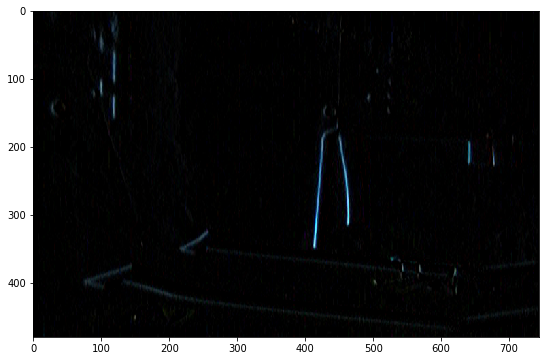

horizontal convolution


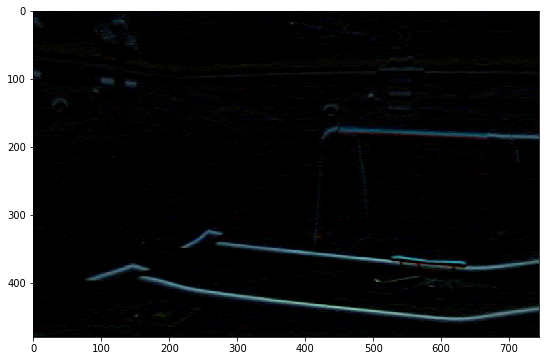

In [74]:
# vertical
print("vertical convolution")
dst1_v = cv2.filter2D(img1, -1, kernel_vert)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_v, cv2.COLOR_BGR2RGB) )
plt.show()

print("horizontal convolution")
dst1_h = cv2.filter2D(img1, -1, kernel_horiz)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_h, cv2.COLOR_BGR2RGB) )
plt.show()

sorbel X convolution


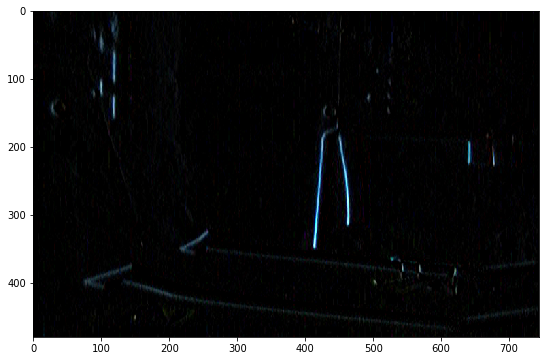

sorbel Y convolution


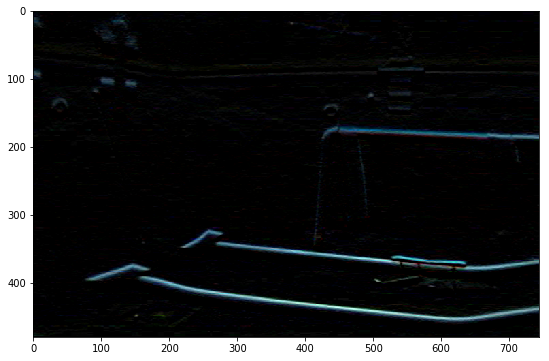

In [75]:
print("sorbel X convolution")
dst1_s = cv2.filter2D(img1, -1, kernel_sorbel_x)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_s, cv2.COLOR_BGR2RGB) )
plt.show()

print("sorbel Y convolution")
dst1_s = cv2.filter2D(img1, -1, kernel_sorbel_y)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_s, cv2.COLOR_BGR2RGB) )
plt.show()

positive diagonal convolution


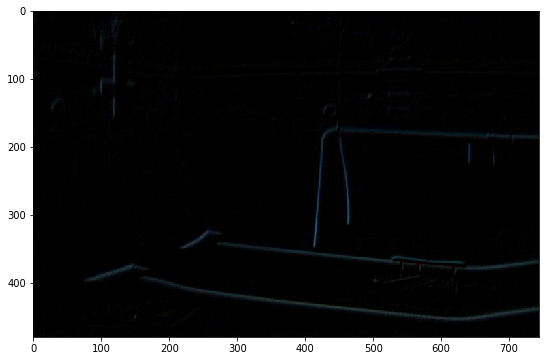

negative diagonal convolution


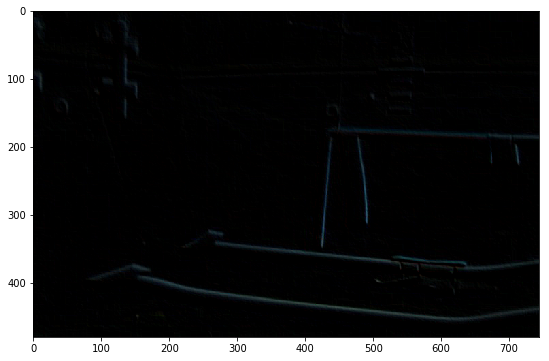

In [84]:
print("positive diagonal convolution")
dst1_dp = cv2.filter2D(img1, -1, kernel_diag_pos)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dp, cv2.COLOR_BGR2RGB) )
plt.show()

print("negative diagonal convolution")
dst1_dn = cv2.filter2D(img1, -1, kernel_diag_neg)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dn, cv2.COLOR_BGR2RGB) )
plt.show()

In [ ]:
# img1_gray = cv2.cvtColor(dst1_v, cv2.COLOR_BGR2GRAY)
# img1_gray = cv2.cvtColor(dst1_h, cv2.COLOR_BGR2GRAY)
# img1_gray = cv2.cvtColor(dst1_dp, cv2.COLOR_BGR2GRAY)
# img1_gray = cv2.cvtColor(dst1_dn, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img1_gray, cmap='gray')
plt.show()

### IMAGE 2

vertical convolution


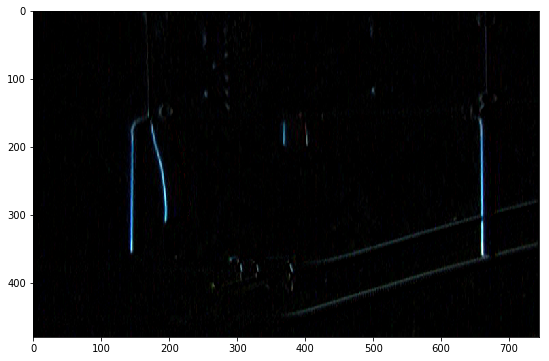

horizontal convolution


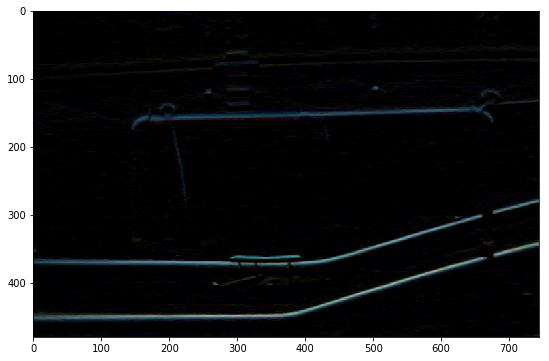

In [80]:
# vertical
print("vertical convolution")
dst2_v = cv2.filter2D(img2, -1, kernel_vert)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_v, cv2.COLOR_BGR2RGB) )
plt.show()

print("horizontal convolution")
dst2_h = cv2.filter2D(img2, -1, kernel_horiz)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_h, cv2.COLOR_BGR2RGB) )
plt.show()

sorbel X convolution


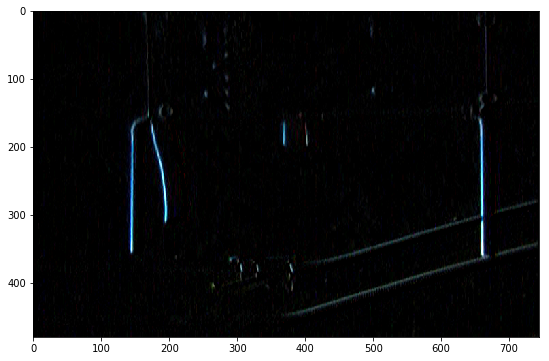

sorbel Y convolution


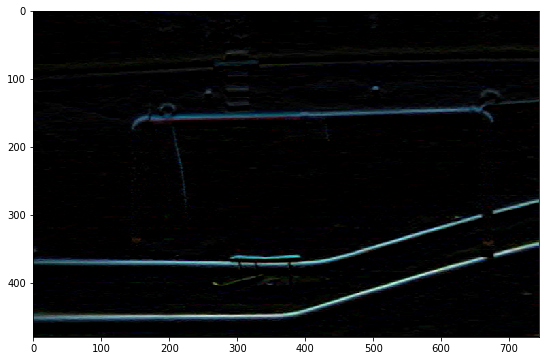

In [81]:
print("sorbel X convolution")
dst2_s = cv2.filter2D(img2, -1, kernel_sorbel_x)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_s, cv2.COLOR_BGR2RGB) )
plt.show()

print("sorbel Y convolution")
dst2_s = cv2.filter2D(img2, -1, kernel_sorbel_y)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_s, cv2.COLOR_BGR2RGB) )
plt.show()

positive diagonal convolution


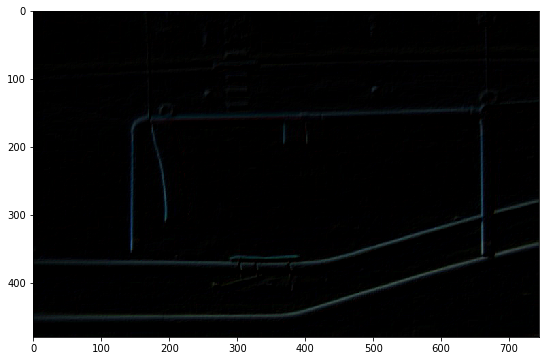

negative diagonal convolution


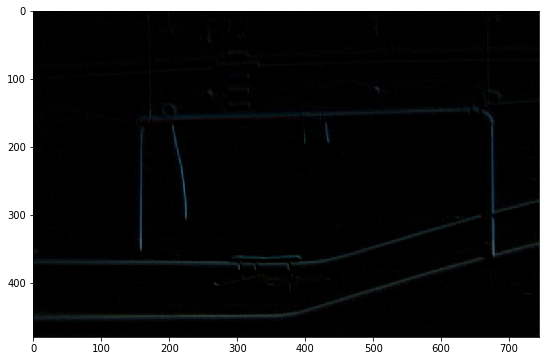

In [85]:
print("positive diagonal convolution")
dst2_dp = cv2.filter2D(img2, -1, kernel_diag_pos)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_dp, cv2.COLOR_BGR2RGB) )
plt.show()

print("negative diagonal convolution")
dst2_dn = cv2.filter2D(img2, -1, kernel_diag_neg)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_dn, cv2.COLOR_BGR2RGB) )
plt.show()

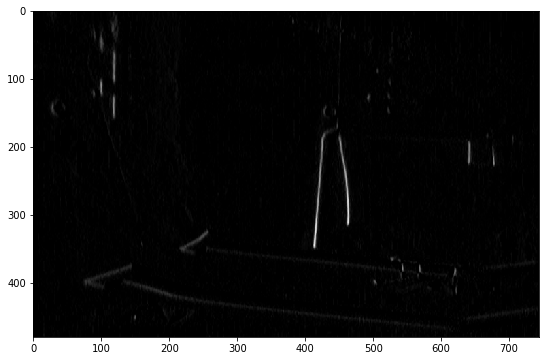

In [79]:
# img2_gray = cv2.cvtColor(dst2_v, cv2.COLOR_BGR2GRAY)
# img2_gray = cv2.cvtColor(dst2_h, cv2.COLOR_BGR2GRAY)
# img2_gray = cv2.cvtColor(dst2_dp, cv2.COLOR_BGR2GRAY)
# img2_gray = cv2.cvtColor(dst2_dn, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img2_gray, cmap='gray')
plt.show()

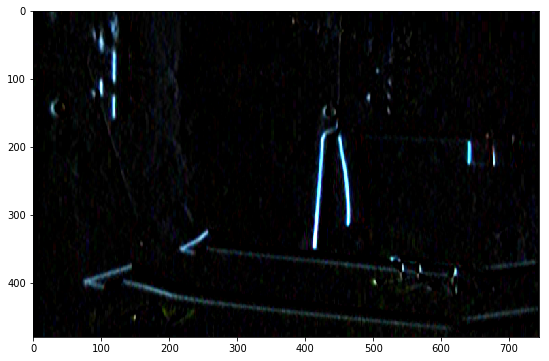

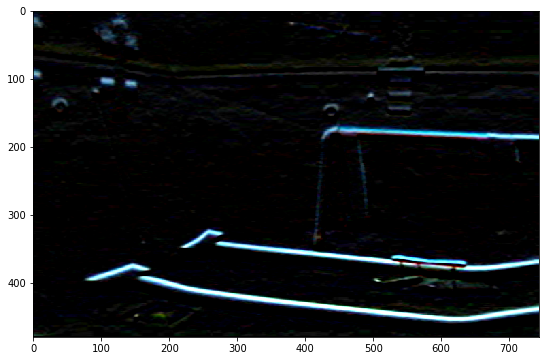

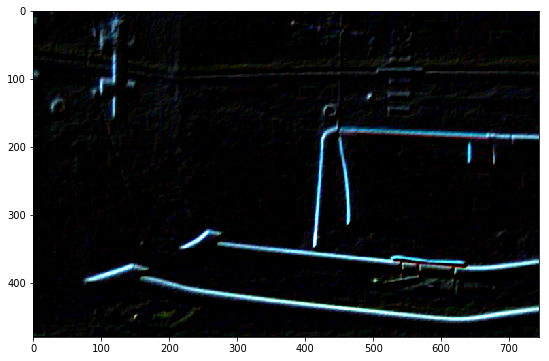

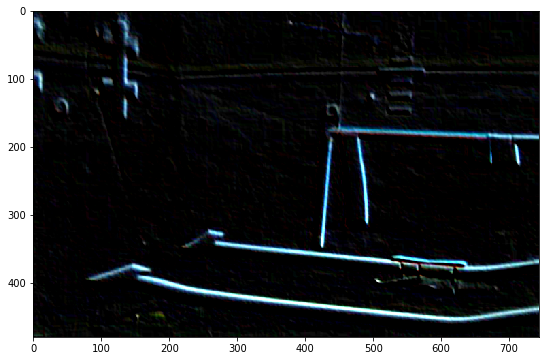

In [37]:

# dst1 = cv2.filter2D(img1, -1, kernel_1)
# plt.figure(figsize=(10, 6) )
# plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB) )
# plt.show()

dst1_h = cv2.filter2D(img1, -1, kernel_vert)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_h, cv2.COLOR_BGR2RGB) )
plt.show()

dst1_v = cv2.filter2D(img1, -1, kernel_horiz)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_v, cv2.COLOR_BGR2RGB) )
plt.show()

dst1_dp = cv2.filter2D(img1, -1, kernel_diag_pos)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dp, cv2.COLOR_BGR2RGB) )
plt.show()

dst1_dn = cv2.filter2D(img1, -1, kernel_diag_neg)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dn, cv2.COLOR_BGR2RGB) )
plt.show()